base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [21]:
import pandas as pd
from datetime import datetime

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regions_raw_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

Piedmont_raw_data=regions_raw_data[regions_raw_data.denominazione_regione=='Piemonte']
Piedmont_raw_data=Piedmont_raw_data.rename(columns = {'data': 'dates'},inplace = False)


In [22]:
Piedmont_raw_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

In [23]:
#Piedmont_raw_data[['dates','totale_positivi','totale_casi']].head()

<AxesSubplot:title={'center':'Figure 1'}, xlabel='dates'>

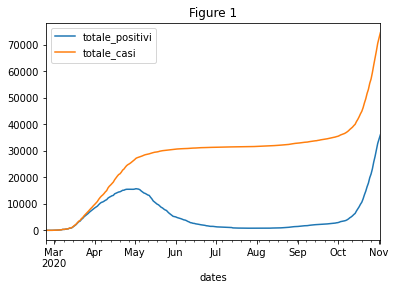

In [24]:
Piedmont_raw_data.plot(x='dates',y=['totale_positivi','totale_casi'], title="Figure 1")

# Figure 1



**totale_positivi (@)**  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare)  
Total amount of current positive cases (Hospitalised patients + Home confinement)  
**totale_casi (#)**  
Totale casi positivi  
Total amount of positive cases  
**(@)** contains   
**(#)** contains

Verification in the two examples below.


In [26]:
Piedmont_raw_data[240:241][['dates','ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare',
                            'totale_positivi']]

,dates,ricoverati_con_sintomi,terapia_intensiva,isolamento_domiciliare,totale_positivi
5053,2020-10-21,1111,74,12250,13435


In [27]:
Piedmont_raw_data[240:241][['dates','casi_da_sospetto_diagnostico','casi_da_screening',
                            'totale_casi']]

,dates,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi
5053,2020-10-21,26093.0,22025.0,48118


In [31]:
Piedmont_raw_data[70:71][['dates','ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare',
                            'totale_positivi']]

,dates,ricoverati_con_sintomi,terapia_intensiva,isolamento_domiciliare,totale_positivi
1483,2020-05-04,2391,161,13010,15562


In [33]:
Piedmont_raw_data[70:71][['dates','casi_da_sospetto_diagnostico','casi_da_screening',
                            'totale_casi']]

,dates,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi
1483,2020-05-04,NaN,NaN,27622


In [35]:
Piedmont_raw_data[70:71]

,dates,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
1483,2020-05-04,ITA,1,Piemonte,45.073274,7.680687,2391,161,2552,13010,...,-76,192,8874,3186,NaN,NaN,27622,176078,123801.0,NaN


In [37]:
Piedmont_raw_data['totale_positivi_omogeneo']=Piedmont_raw_data['ricoverati_con_sintomi']+\
                                              Piedmont_raw_data['terapia_intensiva']+\
                                              Piedmont_raw_data['isolamento_domiciliare']+\
                                              Piedmont_raw_data['dimessi_guariti']+\
                                              Piedmont_raw_data['deceduti']

In [39]:
Piedmont_raw_data[70:71][['totale_positivi_omogeneo']]

,totale_positivi_omogeneo
1483,27622
